# Pymaceuticals Inc.
---

### Analysis

Observations:
1. Capomulin has the second lowest mean and most low median among the drug regimens tested and has the least SEM. This would mean that Capomulin is a highly effective drug and most effective amongst the drug regimens in the data set.
2. "g989" mouse was the one which had duplicate timepoints within the dataset and was excluded from further analysis.
3. There seems to be a positive correlation between the Weight and the size of tumor. This does not imply causation.
4. Gender did not play a role within the study as the populations were fairly equal of male and female mice.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# # Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = combined_df.groupby('Mouse ID')

mouse_count = len(mouse_count['Mouse ID'].unique())
mouse_count

# mouse_count = combined_df['Mouse ID'].value_counts()
# mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

duplicated_mice = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()
duplicated_mice



array(['g989'], dtype=object)

In [4]:

unique_df = combined_df.groupby(['Mouse ID','Timepoint'])
unique_df2 = combined_df[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites']]
unique_df2.head()
unique_df2indexed = combined_df.set_index(['Mouse ID','Timepoint'])
unique_df2indexed.head(10)


Tumor Volume (mm3)  Metastatic Sites Drug Regimen     Sex  \
Mouse ID Timepoint                                                              
b128     0                   45.000000                 0    Capomulin  Female   
         5                   45.651331                 0    Capomulin  Female   
         10                  43.270852                 0    Capomulin  Female   
         15                  43.784893                 0    Capomulin  Female   
         20                  42.731552                 0    Capomulin  Female   
         25                  43.262145                 1    Capomulin  Female   
         30                  40.605335                 1    Capomulin  Female   
         35                  37.967644                 1    Capomulin  Female   
         40                  38.379726                 2    Capomulin  Female   
         45                  38.982878                 2    Capomulin  Female   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
b128     0                   9          22  
         5                   9          22  
         10                  9          22  
         15                  9          22  
         20                  9          22  
         25                  9          22  
         30                  9          22  
         35                  9          22  
         40                  9          22  
         45                  9          22

In [5]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_ID = combined_df.loc[combined_df.duplicated(),:]
duplicated_ID


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_index_mouseIDonly = combined_df.set_index('Mouse ID')
combined_index_mouseIDonly = combined_index_mouseIDonly.loc['g989']
combined_index_mouseIDonly

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.reset_index()
clean_df = combined_df.set_index(['Mouse ID'])
clean_df

cleaned_df = clean_df.drop(['g989'])
cleaned_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...
m601,25,33.118756,1,Capomulin,Male,22,17
m601,30,31.758275,1,Capomulin,Male,22,17
m601,35,30.834357,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_df.describe
cleaned_df.value_counts(['Mouse ID'])


Mouse ID
a203        10
l897        10
m546        10
m550        10
m601        10
            ..
d133         1
b447         1
u153         1
v199         1
t573         1
Length: 248, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_clean = cleaned_df.groupby(['Drug Regimen'])
summary_clean.head(5)
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_mean = summary_clean['Tumor Volume (mm3)'].mean()
summary_median = summary_clean['Tumor Volume (mm3)'].median()
summary_var = summary_clean['Tumor Volume (mm3)'].var()
summary_std = summary_clean['Tumor Volume (mm3)'].std()
summary_SEM = summary_clean['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
Tumor_df = pd.DataFrame({
    'Tumor Mean': round(summary_mean,2),
    'Tumor Median': round(summary_median,2),
    'Tumor Variance': round(summary_var,2),
    'Tumor Std. Deviation': round(summary_std,2),
    'Tumor SEM': round(summary_SEM,2)
})

Tumor_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std. Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor2 = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

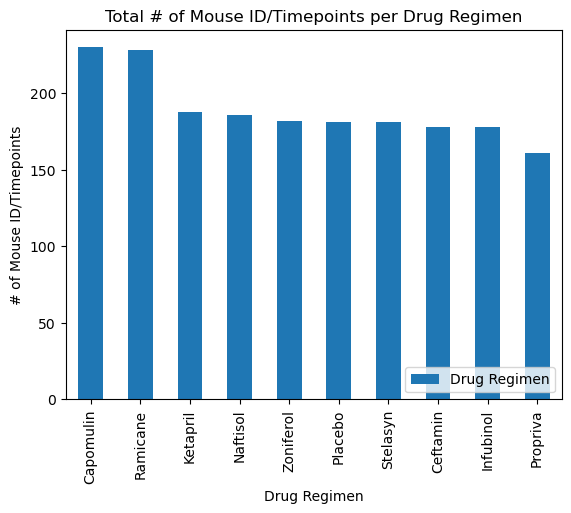

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_count_df = combined_df.groupby('Drug Regimen')['Mouse ID'].count()
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mouse ID/Timepoints')
plt.title('Total # of Mouse ID/Timepoints per Drug Regimen')
plot_count_df.sort_values(ascending=False).plot.bar()
plt.legend(['Drug Regimen'],loc='lower right')

plt.show()


In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


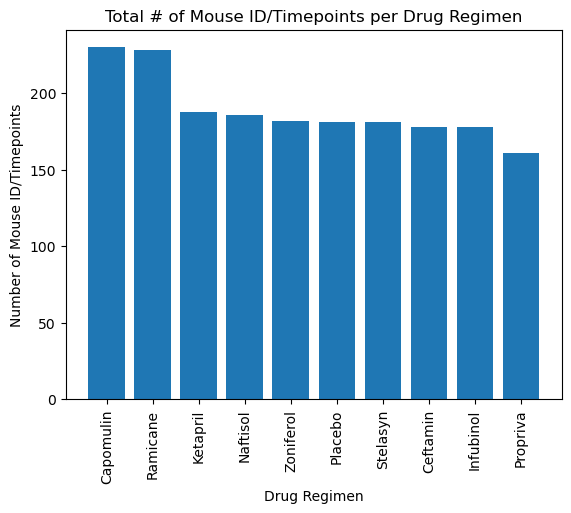

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plot_count_df = plot_count_df.sort_values(ascending=False)
plt.bar(plot_count_df.index, plot_count_df.values)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total # of Mouse ID/Timepoints per Drug Regimen')
plt.show()

<Axes: ylabel='Sex'>

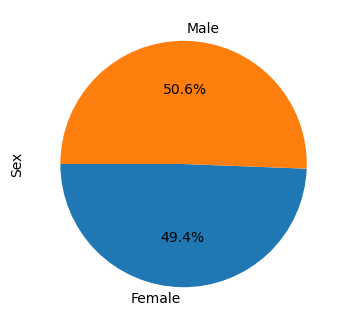

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = combined_df.groupby(['Sex'])['Sex'].count()
sex.plot.pie(startangle=180,autopct="%1.1f%%", figsize=(4,4))


Text(0, 0.5, 'Sex')

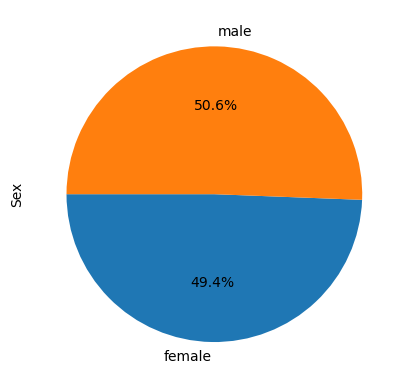

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=('female','male'), startangle=180, autopct='%1.1f%%')
plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()
final_tumor_vol_df = pd.DataFrame(final_tumor_vol)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorgrouped_df = pd.merge(final_tumor_vol_df,cleaned_df, on=['Mouse ID', 'Timepoint'])

tumorgrouped_df = tumorgrouped_df.reset_index()
tumorgrouped_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = tumorgrouped_df.loc[tumorgrouped_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol<= lower_bound) | (tumor_vol >= upper_bound)]
    
    print(f" {treatment}'s potential outliers:",outliers)


#     print(f"-------------------------------------------")
#     print(f"{treatment} Summary Statistics:")
#     print(f"-------------------------------------------")
#     print(f"Median Tumor Volume: {quartiles[0.5]}")
#     print(f"Lower Quartile: {lowerq}")
#     print(f"Upper Quartile: {upperq}")
#     print(f"Interquartile Range: {iqr}")
#     print(f"Lower Bound: {lower_bound}")
#     print(f"Upper Bound: {upper_bound}")
#     if len(outliers) > 0:
#         print(f"Potential outliers: {outliers}")
#     else:
#         print(f"No potential outliers.")
    

 Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


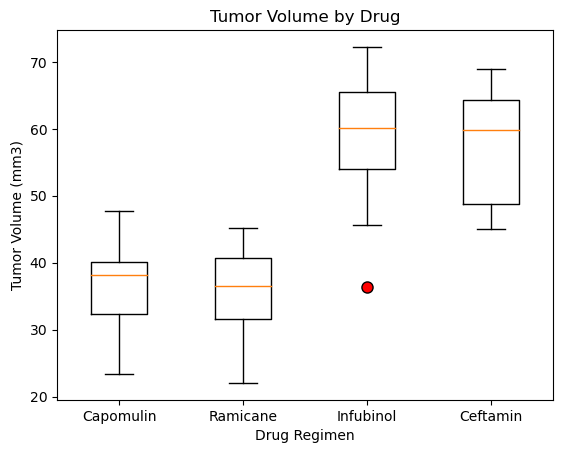

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


graphsettings = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_vol_data, flierprops=graphsettings)

# Add title and labels to boxplot
plt.title('Tumor Volume by Drug')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

/var/folders/4d/c76hmd653psg5zn25v7kvbwm0000gn/T/ipykernel_3569/1981478659.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumorgrouped_df = mouse_df.groupby('Timepoint').mean().reset_index()


Text(0, 0.5, 'Tumor Volume (mm3)')

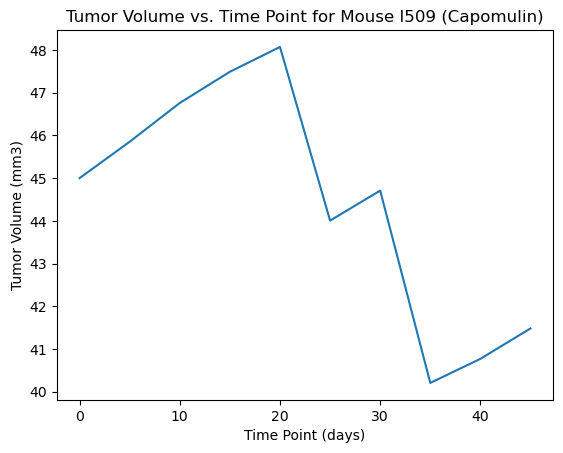

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
mouse_df = capomulin_df.loc[capomulin_df.index == mouse_id]

tumorgrouped_df = mouse_df.groupby('Timepoint').mean().reset_index()
plt.plot(tumorgrouped_df['Timepoint'], tumorgrouped_df['Tumor Volume (mm3)'])
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

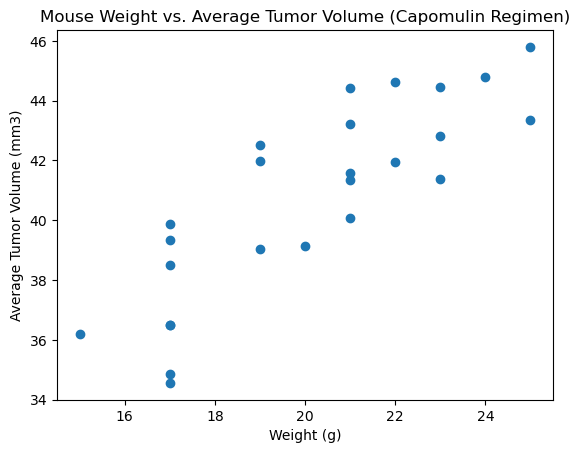

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group the cleaned_df by Mouse ID and calculate the mean of the Tumor Volume (mm3) and Weight (g) columns
grouped_df = cleaned_df.groupby(['Mouse ID', 'Drug Regimen']).agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

capomulin_df = grouped_df.loc[grouped_df['Drug Regimen'] == 'Capomulin']


# Generate the scatter plot


plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'], marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


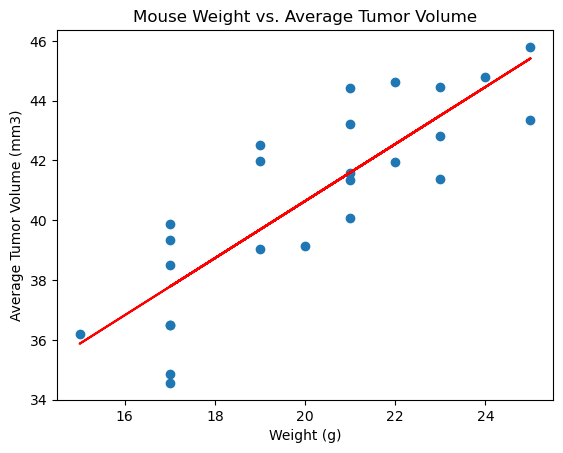

In [21]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = capomulin_df['Tumor Volume (mm3)'].corr(capomulin_df['Weight (g)'])

# Print the correlation coefficient
print(f'The correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}')

# Perform linear regression and plot the line on the scatter plot
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
regress_values = slope * capomulin_df['Weight (g)'] + intercept
plt.plot(capomulin_df['Weight (g)'], regress_values, 'r')

# Generate the scatter plot
plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'], marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

